In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#loading the dataset
#this is a pixel data for a clothing article
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
train_images[0,23,23]#look at one pixel rep from 0-255 rgb

194

In [10]:
train_labels[:10]#look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [11]:
class_names=['T-shirt/top','Trouser','pullover','Dress','Coat'
            ,'Sandal','Sneaker','Bag','Ankle boot']


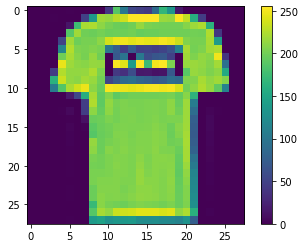

In [12]:
#plot an image from the dataset
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [13]:
#data preprocessing
train_images= train_images / 255.0
test_images=test_images / 255.0

In [14]:
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Flatten,Dense

In [15]:
model=keras.Sequential([
    keras.layers.Conv1D(filters=32,activation='relu',kernel_size=2, input_shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#lets see if it will work now

In [17]:
model.fit(train_images,train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 249s 133ms/step - loss: 0.4553 - accuracy: 0.8380
Epoch 2/3
1875/1875 [==============================] - 72s 39ms/step - loss: 0.3317 - accuracy: 0.8792
Epoch 3/3
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2924 - accuracy: 0.8915


In [18]:
 test_loss, test_accuracy=model.evaluate(test_images, test_labels,verbose=1)
    

313/313 [==============================] - 4s 13ms/step - loss: 0.3304 - accuracy: 0.8819


In [19]:
print('test_accuracy',test_accuracy)


test_accuracy 0.8819000124931335
test_loss 0.33042269945144653


In [20]:
print('test_loss',test_loss)

test_loss 0.33042269945144653


In [21]:
predictions=model.predict(test_images)

In [22]:
print(predictions[0])

[1.8033842e-07 7.1321317e-08 6.8577400e-08 5.7895079e-08 8.0250874e-07
 2.0954187e-03 5.0870841e-07 1.5673442e-03 1.0825806e-06 9.9633443e-01]


Trouser


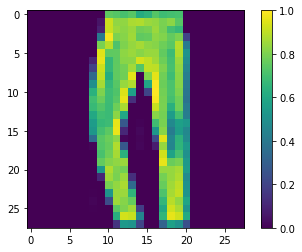

In [26]:
import numpy as np
print(class_names[np.argmax(predictions[5])])
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()